### Прямоугольные антенны, диаметр 0.08 мм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_excel('../data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 11) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник {wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('l, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('L, мкГн')
    ax.set_xlabel('N')
    return ax, res

In [3]:
def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник {wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('L, мкГн')
    ax.set_xlabel('d, мм')
    return ax, res

In [5]:
rows = ['V305','VEXPN1','VEXPN1_2','VEXPN1_4']
expn = df.loc[(df['file'].isin(rows))]
expn['N1'] = expn['mod'].apply(lambda x: 0 if x == 'rect-v' else int(x.rstrip('?').lstrip('rect-teeth-4-').split('-')[0]))

expn008 = expn.loc[expn['wire_dia (mm)'] == 0.08]
expn01 = expn.loc[expn['wire_dia (mm)'] == 0.1]

d:\work\python\jupyter\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


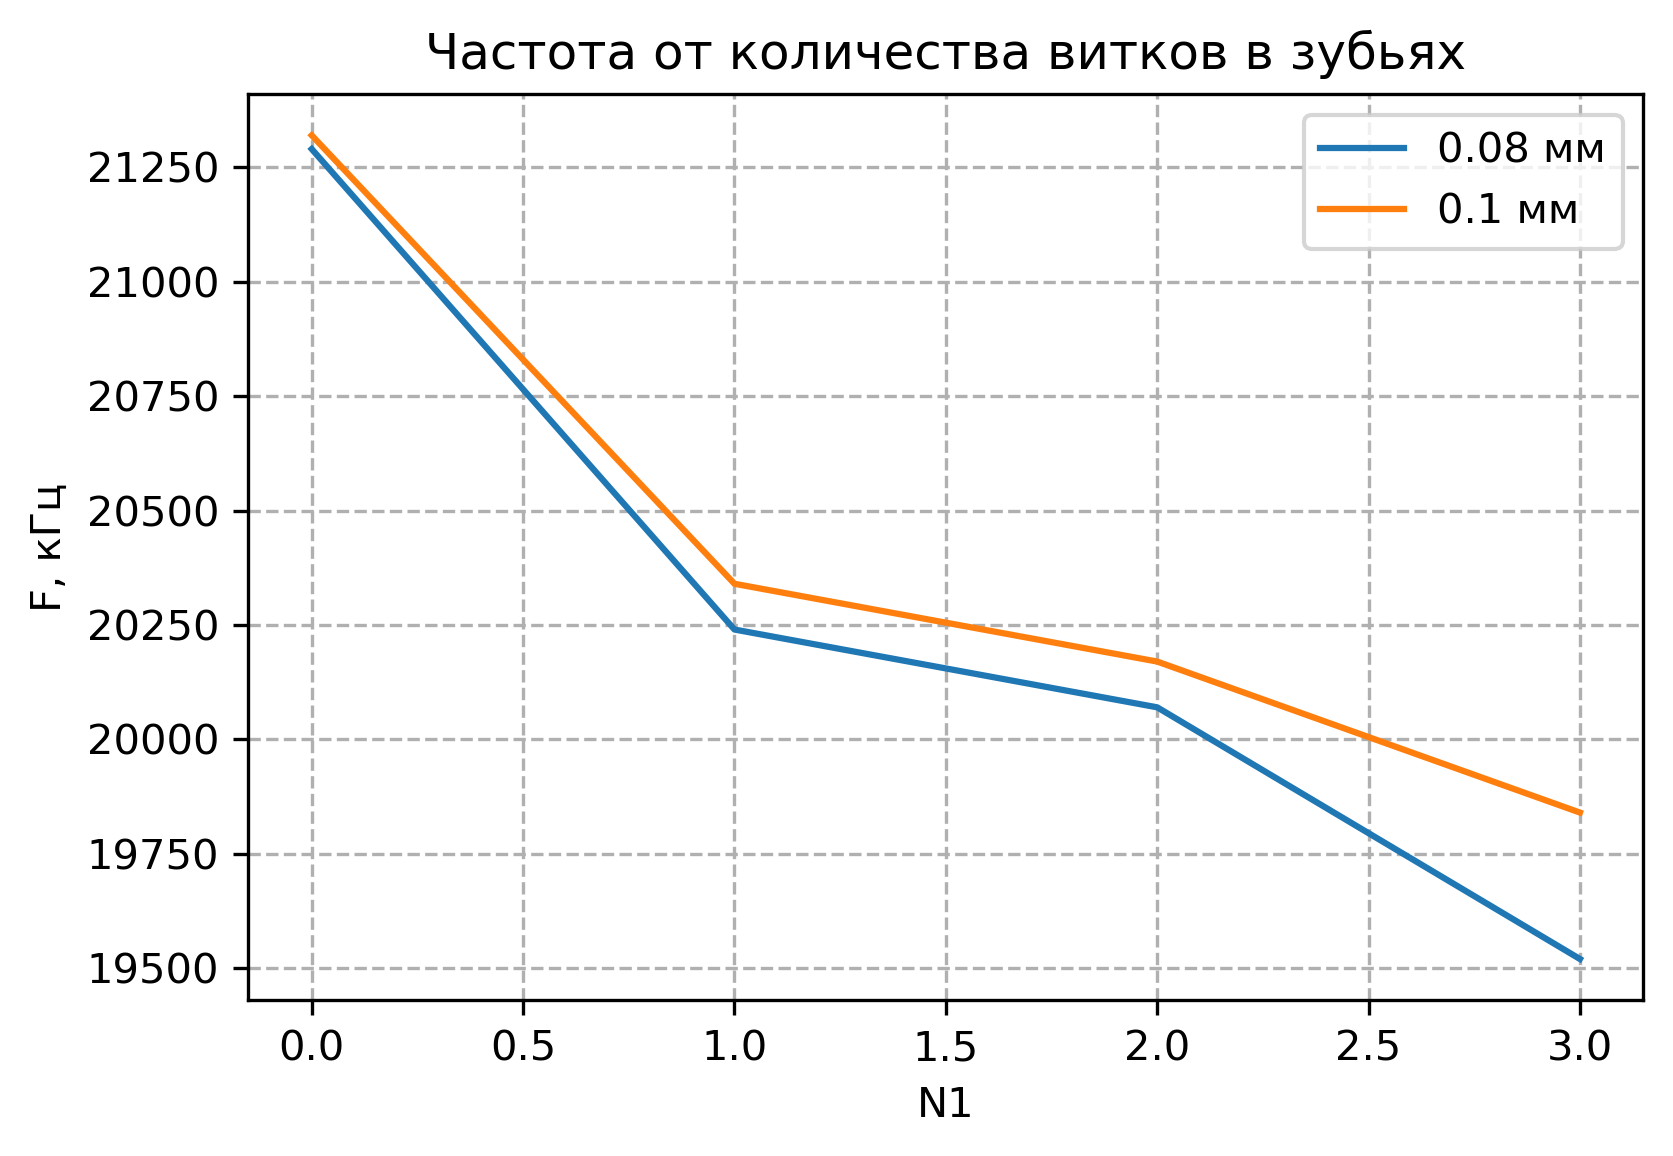

In [12]:
ax = expn008.plot(x='N1', y='freq', label='0.08 мм')
expn01.plot(x='N1', y='freq', label='0.1 мм', ax=ax)
ax.set_ylabel('F, кГц')
ax.set_title('Частота от количества витков в зубьях')
ax.grid(linestyle='--')